In [1]:
import ROOT
from ROOT import larlite
from ROOT import TFile
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as smp
import root_numpy as rn
import pandas as pd
from math import cos
from scipy.optimize import curve_fit
%matplotlib inline

/Library/Python/2.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.10.2 is currently installed but you installed root_numpy against numpy 1.8.0rc1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [2]:
FULL = "FullBNB_Mesons_mcvars.root"
SEL2 = "Sel2_Mesons_mcvars.root"
HITFIL = "Filter_Mesons_mcvars.root"
FINAL = "Final_Mesons_mcvars.root"

pi0_v = rn.root2array(FULL,
                    treename='pi0_tree',
                    branches=['true_pi0_e','true_angle','true_asym',\
                              'reco_pi0_e','true_pi0_mom','true_gamma_e_min',\
                              'true_gamma_e_max','true_RL_maxE','true_RL_minE','true_nu_e','event'])

pi0_s2_v = rn.root2array(SEL2,
                    treename='pi0_tree',
                    branches=['true_pi0_e','true_angle','true_asym',\
                              'reco_pi0_e','true_pi0_mom','true_gamma_e_min',\
                              'true_gamma_e_max','true_RL_maxE','true_RL_minE','true_nu_e','event'])

pi0_hf_v = rn.root2array(HITFIL,
                    treename='pi0_tree',
                    branches=['true_pi0_e','true_angle','true_asym',\
                              'reco_pi0_e','true_pi0_mom','true_gamma_e_min',\
                              'true_gamma_e_max','true_RL_maxE','true_RL_minE','true_nu_e','event'])

pi0_fin_v = rn.root2array(FINAL,
                    treename='pi0_tree',
                    branches=['true_pi0_e','true_angle','true_asym',\
                              'reco_pi0_e','true_pi0_mom','true_gamma_e_min',\
                              'true_gamma_e_max','true_RL_maxE','true_RL_minE','true_nu_e','event'])

In [ ]:

full_pi0_e = [pi0_v[i][0] for i in xrange(pi0_v.shape[0]) if pi0_v[i][1] != -999 ]
#full_eff = [pi0_v[i][0]/np.cumsum(pi0_v[0]) for i in xrange(pi0_v.shape[0]) if pi0_v[i][1] != -999 ]
full_angle = [cos(pi0_v[i][1]) for i in xrange(pi0_v.shape[0]) if pi0_v[i][1] != -999 ]
full_mom = [pi0_v[i][4] for i in xrange(pi0_v.shape[0]) if pi0_v[i][1] != -999 ]
full_g_min_e = [pi0_v[i][5] for i in xrange(pi0_v.shape[0]) if pi0_v[i][1] != -999 ]
full_g_max_e = [pi0_v[i][6] for i in xrange(pi0_v.shape[0]) if pi0_v[i][1] != -999 ]
full_RL_maxE = [pi0_v[i][7] for i in xrange(pi0_v.shape[0]) if pi0_v[i][1] != -999 ]
full_RL_minE = [pi0_v[i][8] for i in xrange(pi0_v.shape[0]) if pi0_v[i][1] != -999 ]
full_nue = [pi0_v[i][9]*1000 for i in xrange(pi0_v.shape[0]) if pi0_v[i][1] != -999 ]
full_asym = [ (full_g_max_e[i] - full_g_min_e[i])/(full_g_max_e[i] + full_g_min_e[i]) \
               for i in xrange(len(full_g_min_e)) if full_g_max_e[i] + full_g_min_e[i]!=0]

sel2_pi0_e = [pi0_s2_v[i][0] for i in xrange(pi0_s2_v.shape[0]) if pi0_s2_v[i][1] != -999 ]
sel2_angle = [cos(pi0_s2_v[i][1]) for i in xrange(pi0_s2_v.shape[0]) if pi0_s2_v[i][1] != -999 ]
sel2_mom = [pi0_s2_v[i][4] for i in xrange(pi0_s2_v.shape[0]) if pi0_s2_v[i][1] != -999 ]
sel2_g_min_e = [pi0_s2_v[i][5] for i in xrange(pi0_s2_v.shape[0]) if pi0_s2_v[i][1] != -999 ]
sel2_g_max_e = [pi0_s2_v[i][6] for i in xrange(pi0_s2_v.shape[0]) if pi0_s2_v[i][1] != -999 ]
sel2_RL_maxE = [pi0_s2_v[i][7] for i in xrange(pi0_s2_v.shape[0]) if pi0_s2_v[i][1] != -999 ]
sel2_RL_minE = [pi0_s2_v[i][8] for i in xrange(pi0_s2_v.shape[0]) if pi0_s2_v[i][1] != -999 ]
sel2_nue = [pi0_s2_v[i][9]*1000 for i in xrange(pi0_s2_v.shape[0]) if pi0_s2_v[i][1] != -999 ]
sel2_asym = [ (sel2_g_max_e[i] - sel2_g_min_e[i])/(sel2_g_max_e[i] + sel2_g_min_e[i]) \
               for i in xrange(len(sel2_g_min_e)) if sel2_g_max_e[i] + sel2_g_min_e[i]!=0]

fil_pi0_e = [pi0_hf_v[i][0] for i in xrange(pi0_hf_v.shape[0]) if pi0_hf_v[i][1] != -999 ]
fil_angle = [cos(pi0_hf_v[i][1]) for i in xrange(pi0_hf_v.shape[0]) if pi0_hf_v[i][1] != -999 ]
fil_mom = [pi0_hf_v[i][4] for i in xrange(pi0_hf_v.shape[0]) if pi0_hf_v[i][1] != -999 ]
fil_g_min_e = [pi0_hf_v[i][5] for i in xrange(pi0_hf_v.shape[0]) if pi0_hf_v[i][1] != -999 ]
fil_g_max_e = [pi0_hf_v[i][6] for i in xrange(pi0_hf_v.shape[0]) if pi0_hf_v[i][1] != -999 ]
fil_RL_maxE = [pi0_hf_v[i][7] for i in xrange(pi0_hf_v.shape[0]) if pi0_hf_v[i][1] != -999 ]
fil_RL_minE = [pi0_hf_v[i][8] for i in xrange(pi0_hf_v.shape[0]) if pi0_hf_v[i][1] != -999 ]
fil_nue = [pi0_hf_v[i][9]*1000 for i in xrange(pi0_hf_v.shape[0]) if pi0_hf_v[i][1] != -999 ]
fil_asym = [ (fil_g_max_e[i] - fil_g_min_e[i])/(fil_g_max_e[i] + fil_g_min_e[i]) \
               for i in xrange(len(fil_g_min_e)) if fil_g_max_e[i] + fil_g_min_e[i]!=0]

fin_pi0_e = [pi0_fin_v[i][0] for i in xrange(pi0_fin_v.shape[0]) if pi0_fin_v[i][1] != -999 ]
fin_angle = [cos(pi0_fin_v[i][1]) for i in xrange(pi0_fin_v.shape[0]) if pi0_fin_v[i][1] != -999 ]
fin_mom = [pi0_fin_v[i][4] for i in xrange(pi0_fin_v.shape[0]) if pi0_fin_v[i][1] != -999 ]
fin_g_min_e = [pi0_fin_v[i][5] for i in xrange(pi0_fin_v.shape[0]) if pi0_fin_v[i][1] != -999 ]
fin_g_max_e = [pi0_fin_v[i][6] for i in xrange(pi0_fin_v.shape[0]) if pi0_fin_v[i][1] != -999 ]
fin_RL_maxE = [pi0_fin_v[i][7] for i in xrange(pi0_fin_v.shape[0]) if pi0_fin_v[i][1] != -999 ]
fin_RL_minE = [pi0_fin_v[i][8] for i in xrange(pi0_fin_v.shape[0]) if pi0_fin_v[i][1] != -999 ]
fin_nue = [pi0_fin_v[i][9]*1000 for i in xrange(pi0_fin_v.shape[0]) if pi0_fin_v[i][1] != -999 ]
fin_asym = [ (fin_g_max_e[i] - fin_g_min_e[i])/(fin_g_max_e[i] + fin_g_min_e[i]) \
               for i in xrange(len(fin_g_min_e)) if fin_g_max_e[i] + fin_g_min_e[i]!=0]


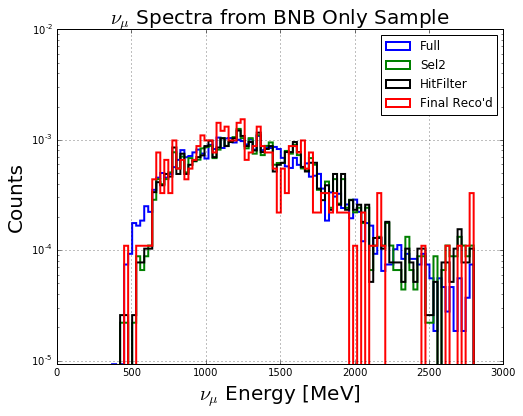

In [3]:
plt.figure(figsize=(8,6))
n=True
plt.hist(full_nue,bins=100,histtype='step',normed=n,fill=None,edgecolor='b',lw=2,label='Full',range=[100,2800])
plt.hist(sel2_nue,bins=100,histtype='step',normed=n,fill=None,edgecolor='g',lw=2,label='Sel2',range=[100,2800])
plt.hist(fil_nue,bins=100,histtype='step',normed=n,fill=None,edgecolor='k',lw=2,label='HitFilter',range=[100,2800])
plt.hist(fin_nue,bins=100,histtype='step',normed=n,fill=None,edgecolor='r',lw=2,label='Final Reco\'d',range=[100,2800])
plt.grid(True)
plt.xlabel("$\\nu_\mu$ Energy [MeV]",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.title("$\\nu_\mu$ Spectra from BNB Only Sample",fontsize=20)
plt.yscale('log')
plt.legend()
plt.ylim(0,0.01) #600)
plt.savefig("Plots/nuTrueEnergy_mes.png")

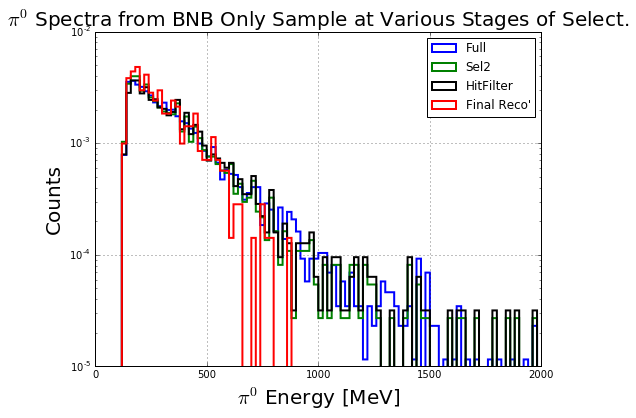

In [4]:
plt.figure(figsize=(8,6))
n=True
plt.hist(full_pi0_e,bins=100,histtype='step',normed=n,fill=None,edgecolor='b',lw=2,label='Full',range=[0,2000])
plt.hist(sel2_pi0_e,bins=100,histtype='step',normed=n,fill=None,edgecolor='g',lw=2,label='Sel2',range=[0,2000])
plt.hist(fil_pi0_e,bins=100,histtype='step',normed=n,fill=None,edgecolor='k',lw=2,label='HitFilter',range=[0,2000])
plt.hist(fin_pi0_e,bins=100,histtype='step',normed=n,fill=None,edgecolor='r',lw=2,label='Final Reco\'',range=[0,2000])
plt.grid(True)
plt.xlabel("$\pi^0$ Energy [MeV]",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.title("$\pi^0$ Spectra from BNB Only Sample at Various Stages of Select.",fontsize=20)
plt.yscale('log')
#plt.ylim(0,1000)
plt.legend()
plt.savefig("Plots/pi0TrueEnergy_mes.png")

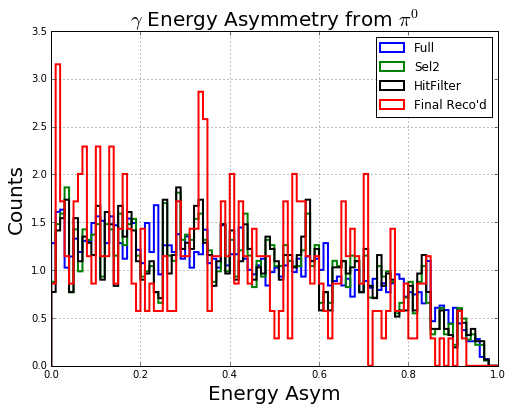

In [5]:
plt.figure(figsize=(8,6))
n=True
plt.hist(full_asym,bins=100,histtype='step',normed=n,fill=None,edgecolor='b',lw=2,label='Full',range=[0,1])
plt.hist(sel2_asym,bins=100,histtype='step',normed=n,fill=None,edgecolor='g',lw=2,label='Sel2',range=[0,1])
plt.hist(fil_asym,bins=100,histtype='step',normed=n,fill=None,edgecolor='k',lw=2,label='HitFilter',range=[0,1])
plt.hist(fin_asym,bins=100,histtype='step',normed=n,fill=None,edgecolor='r',lw=2,label='Final Reco\'d',range=[0,1])
plt.grid(True)
plt.xlabel("Energy Asym",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.title("$\\gamma$ Energy Asymmetry from $\\pi^0$",fontsize=20)
#plt.yscale('log')
plt.legend()
#plt.ylim(0,1000)
plt.savefig("Plots/eAsym_mes.png")

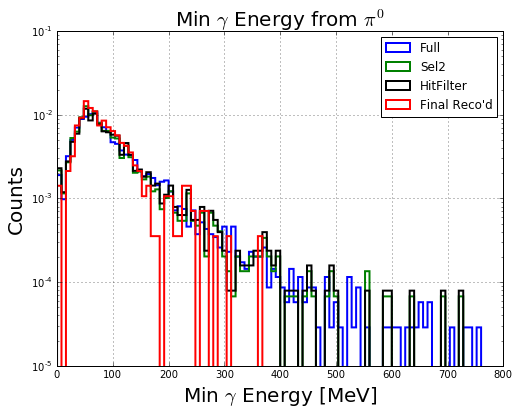

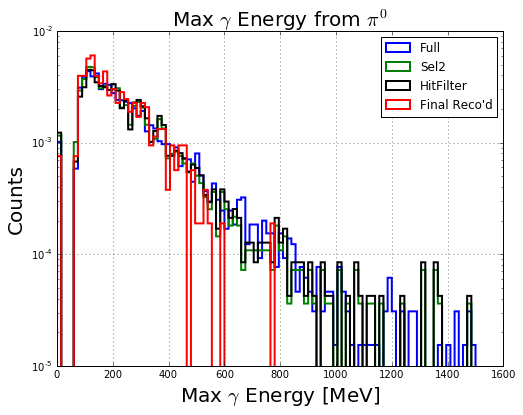

In [6]:
plt.figure(figsize=(8,6))
n=True
plt.hist(full_g_min_e,bins=100,histtype='step',normed=n,fill=None,edgecolor='b',lw=2,label='Full',range=[0,800])
plt.hist(sel2_g_min_e,bins=100,histtype='step',normed=n,fill=None,edgecolor='g',lw=2,label='Sel2',range=[0,800])
plt.hist(fil_g_min_e,bins=100,histtype='step',normed=n,fill=None,edgecolor='k',lw=2,label='HitFilter',range=[0,800])
plt.hist(fin_g_min_e,bins=100,histtype='step',normed=n,fill=None,edgecolor='r',lw=2,label='Final Reco\'d',range=[0,800])
plt.grid(True)
plt.xlabel("Min $\\gamma$ Energy [MeV]",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.title("Min $\\gamma$ Energy from $\\pi^0$",fontsize=20)
plt.yscale('log')
plt.legend()
#plt.ylim(0,1000)
plt.savefig("Plots/gamMinEnergy_mes.png")

plt.figure(figsize=(8,6))
plt.hist(full_g_max_e,bins=100,histtype='step',normed=n,fill=None,edgecolor='b',lw=2,label='Full',range=[0,1500])
plt.hist(sel2_g_max_e,bins=100,histtype='step',normed=n,fill=None,edgecolor='g',lw=2,label='Sel2',range=[0,1500])
plt.hist(fil_g_max_e,bins=100,histtype='step',normed=n,fill=None,edgecolor='k',lw=2,label='HitFilter',range=[0,1500])
plt.hist(fin_g_max_e,bins=100,histtype='step',normed=n,fill=None,edgecolor='r',lw=2,label='Final Reco\'d',range=[0,1500])
plt.grid(True)
plt.xlabel("Max $\\gamma$ Energy [MeV]",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.title("Max $\\gamma$ Energy from $\\pi^0$",fontsize=20)
plt.yscale('log')
plt.legend()
#plt.ylim(0,1000)
plt.savefig("Plots/gamMaxEnergy_mes.png")


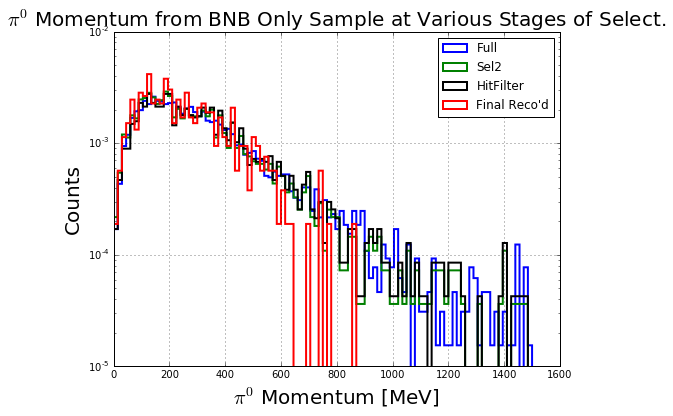

In [7]:
plt.figure(figsize=(8,6))
n=True
plt.hist(full_mom,bins=100,histtype='step',normed=n,fill=None,edgecolor='b',lw=2,label='Full',range=[0,1500])
plt.hist(sel2_mom,bins=100,histtype='step',normed=n,fill=None,edgecolor='g',lw=2,label='Sel2',range=[0,1500])
plt.hist(fil_mom,bins=100,histtype='step',normed=n,fill=None,edgecolor='k',lw=2,label='HitFilter',range=[0,1500])
plt.hist(fin_mom,bins=100,histtype='step',normed=n,fill=None,edgecolor='r',lw=2,label='Final Reco\'d',range=[0,1500])
plt.grid(True)
plt.xlabel("$\pi^0$ Momentum [MeV]",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.title("$\pi^0$ Momentum from BNB Only Sample at Various Stages of Select.",fontsize=20)
plt.yscale('log')
plt.legend()
plt.savefig("Plots/pi0Mom_mes.png")

#plt.ylim(1,10000)

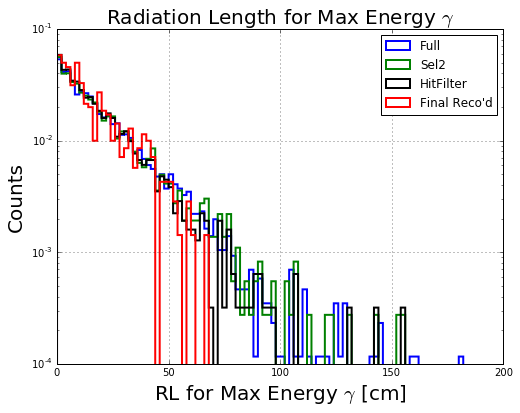

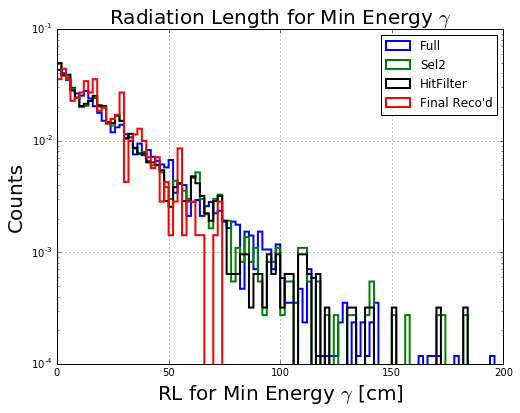

In [8]:
plt.figure(figsize=(8,6))
n=True
plt.hist(full_RL_maxE,bins=100,histtype='step',normed=n,fill=None,edgecolor='b',lw=2,label='Full',range=[0,200])
plt.hist(sel2_RL_maxE,bins=100,histtype='step',normed=n,fill=None,edgecolor='g',lw=2,label='Sel2',range=[0,200])
plt.hist(fil_RL_maxE,bins=100,histtype='step',normed=n,fill=None,edgecolor='k',lw=2,label='HitFilter',range=[0,200])
plt.hist(fin_RL_maxE,bins=100,histtype='step',normed=n,fill=None,edgecolor='r',lw=2,label='Final Reco\'d',range=[0,200])
plt.grid(True)
plt.xlabel("RL for Max Energy $\\gamma$ [cm]",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.title("Radiation Length for Max Energy $\\gamma$",fontsize=20)
plt.yscale('log')
plt.legend()
plt.savefig("Plots/RL_maxE_mes.png")

plt.figure(figsize=(8,6))
plt.hist(full_RL_minE,bins=100,histtype='step',normed=n,fill=None,edgecolor='b',lw=2,label='Full',range=[0,200])
plt.hist(sel2_RL_minE,bins=100,histtype='step',normed=n,fill=None,edgecolor='g',lw=2,label='Sel2',range=[0,200])
plt.hist(fil_RL_minE,bins=100,histtype='step',normed=n,fill=None,edgecolor='k',lw=2,label='HitFilter',range=[0,200])
plt.hist(fin_RL_minE,bins=100,histtype='step',normed=n,fill=None,edgecolor='r',lw=2,label='Final Reco\'d',range=[0,200])
plt.grid(True)
plt.xlabel("RL for Min Energy $\\gamma$ [cm]",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.title("Radiation Length for Min Energy $\\gamma$",fontsize=20)
plt.yscale('log')
plt.legend()
plt.savefig("Plots/RL_minE_mes.png")

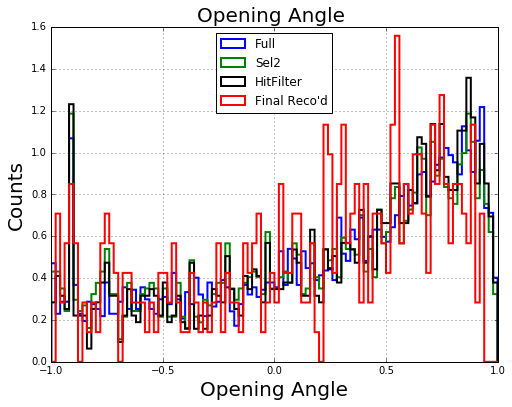

In [9]:
plt.figure(figsize=(8,6))
n=True
plt.hist(full_angle,bins=100,histtype='step',normed=n,fill=None,edgecolor='b',lw=2,label='Full',range=[-1,1])
plt.hist(sel2_angle,bins=100,histtype='step',normed=n,fill=None,edgecolor='g',lw=2,label='Sel2',range=[-1,1])
plt.hist(fil_angle,bins=100,histtype='step',normed=n,fill=None,edgecolor='k',lw=2,label='HitFilter',range=[-1,1])
plt.hist(fin_angle,bins=100,histtype='step',normed=n,fill=None,edgecolor='r',lw=2,label='Final Reco\'d',range=[-1,1])
plt.grid(True)
plt.xlabel("Opening Angle",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.title("Opening Angle ",fontsize=20)
#plt.yscale('log')
plt.legend(loc=9)
plt.savefig("Plots/Oangle_mes.png")

In [11]:
DATA = "BNBONLY_ertool_hist.root"

data_v = rn.root2array(DATA,
                    treename='_pi0_selected_tree',
                    branches=['_Rmass_S','_RE_A_S','_RE_B_S','_ROangle_S',\
                              '_RadL_A','_RadL_B','_full_pi0_mom'] )

mass_d = [data_v[i][0] for i in xrange(data_v.shape[0])] 
Emax_d = [data_v[i][1] if data_v[i][1] > data_v[i][2] else data_v[i][2] for i in xrange(data_v.shape[0]) ] 
Emin_d = [data_v[i][1] if data_v[i][1] < data_v[i][2] else data_v[i][2] for i in xrange(data_v.shape[0]) ] 
OAng_d = [data_v[i][3] for i in xrange(data_v.shape[0])] 
RL_Emax_d = [data_v[i][4] if data_v[i][1] > data_v[i][2] else data_v[i][5] for i in xrange(data_v.shape[0]) ] 
RL_Emin_d = [data_v[i][4] if data_v[i][1] < data_v[i][2] else data_v[i][5] for i in xrange(data_v.shape[0]) ] 
full_mom_d = [data_v[i][6] for i in xrange(data_v.shape[0])] 
full_E_d = [data_v[i][1] + data_v[i][2] for i in xrange(data_v.shape[0])] 

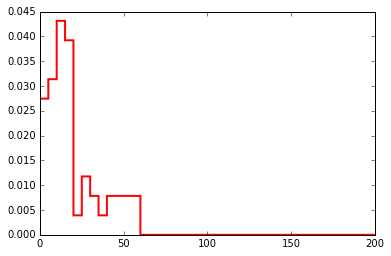

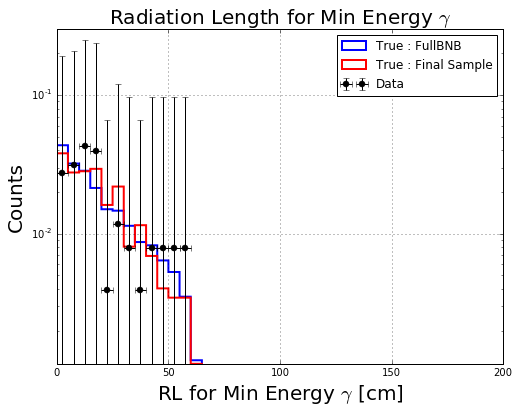

In [12]:
n=True #False #True
counts, bin_edges, _ = plt.hist(RL_Emin_d,bins=40,histtype='step',normed=n,fill=None,edgecolor='r',lw=2,label='Final Reco\'d',range=[0,200])
bin_centers = 0.5*(bin_edges[1:]+bin_edges[:-1])
bin_width = (bin_centers[1]-bin_centers[0])/2.

full_RL_cut = [full_RL_minE[i] for i in xrange(len(full_RL_minE)) if full_RL_minE[i] < 62] #[full_angle > 0.35]
fin_RL_cut = [fin_RL_minE[i] for i in xrange(len(fin_RL_minE)) if fin_RL_minE[i] < 62] #[full_angle > 0.35]

plt.figure(figsize=(8,6))
#print counts #[3]/np.cumsum(counts)[-1]
plt.hist(full_RL_cut,bins=40,histtype='step',normed=n,fill=None,edgecolor='b',lw=2,label='True : FullBNB',range=[0,200])
plt.hist(fin_RL_cut,bins=40,histtype='step',normed=n,fill=None,edgecolor='r',lw=2,label='True : Final Sample',range=[0,200])
plt.errorbar(bin_centers,counts,yerr=np.sqrt(counts),xerr=bin_width,fmt='o',color='k',label='Data')
plt.grid(True)
plt.xlabel("RL for Min Energy $\\gamma$ [cm]",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.title("Radiation Length for Min Energy $\\gamma$",fontsize=20)
plt.yscale('log')
plt.ylim(0,0.3)
plt.legend()
plt.savefig("Plots/RL_minE_COMPARE_mes.png")

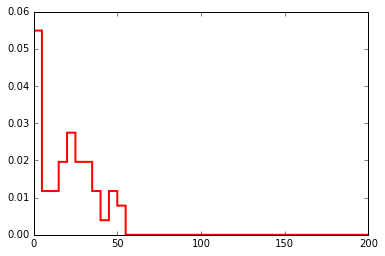

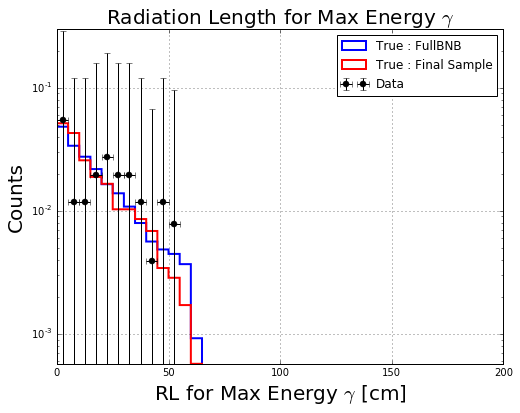

In [13]:
n=True #False #True
counts, bin_edges, _ = plt.hist(RL_Emax_d,bins=40,histtype='step',normed=n,fill=None,edgecolor='r',lw=2,label='Final Reco\'d',range=[0,200])
bin_centers = 0.5*(bin_edges[1:]+bin_edges[:-1])
bin_width = (bin_centers[1]-bin_centers[0])/2.

full_RL_cut = [full_RL_maxE[i] for i in xrange(len(full_RL_maxE)) if full_RL_maxE[i] < 62] #[full_angle > 0.35]
fin_RL_cut = [fin_RL_maxE[i] for i in xrange(len(fin_RL_maxE)) if fin_RL_maxE[i] < 62] #[full_angle > 0.35]

plt.figure(figsize=(8,6))
#print counts #[3]/np.cumsum(counts)[-1]
plt.hist(full_RL_cut,bins=40,histtype='step',normed=n,fill=None,edgecolor='b',lw=2,label='True : FullBNB',range=[0,200])
plt.hist(fin_RL_cut,bins=40,histtype='step',normed=n,fill=None,edgecolor='r',lw=2,label='True : Final Sample',range=[0,200])
plt.errorbar(bin_centers,counts,yerr=np.sqrt(counts),xerr=bin_width,fmt='o',color='k',label='Data')
plt.grid(True)
plt.xlabel("RL for Max Energy $\\gamma$ [cm]",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.title("Radiation Length for Max Energy $\\gamma$",fontsize=20)
plt.yscale('log')
plt.ylim(0,0.3)
plt.legend()
plt.savefig("Plots/RL_maxE_COMPARE_mes.png")

[ 0.00156863  0.0172549   0.01882353  0.0172549   0.01098039  0.00784314
  0.00156863  0.00313725  0.00156863  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]


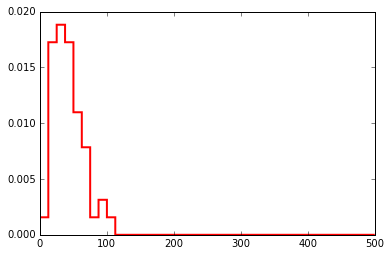

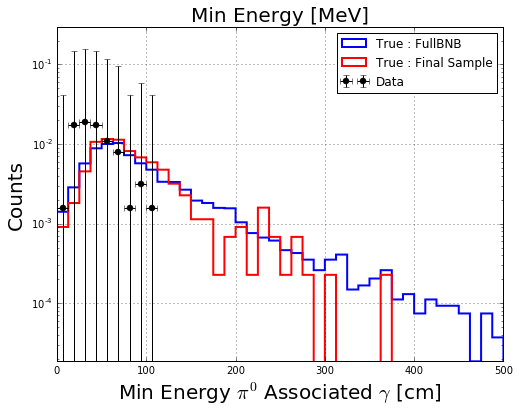

In [14]:
n=True #False #True
counts, bin_edges, _ = plt.hist(Emin_d,bins=40,histtype='step',normed=n,fill=None,edgecolor='r',lw=2,label='Data\'d',range=[0,500])
bin_centers = 0.5*(bin_edges[1:]+bin_edges[:-1])
bin_width = (bin_centers[1]-bin_centers[0])/2.

plt.figure(figsize=(8,6))
print counts #[3]/np.cumsum(counts)[-1]
plt.hist(full_g_min_e,bins=40,histtype='step',normed=n,fill=None,edgecolor='b',lw=2,label='True : FullBNB',range=[0,500])
plt.hist(fin_g_min_e,bins=40,histtype='step',normed=n,fill=None,edgecolor='r',lw=2,label='True : Final Sample',range=[0,500])
plt.errorbar(bin_centers,counts,yerr=np.sqrt(counts),xerr=bin_width,fmt='o',color='k',label='Data')
plt.grid(True)
plt.xlabel("Min Energy $\\pi^0$ Associated $\\gamma$ [cm]",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.title("Min Energy [MeV]",fontsize=20)
plt.yscale('log')
plt.ylim(0,0.3)
plt.legend()
plt.savefig("Plots/minGE_COMPARE_mes.png")

[ 0.          0.          0.00261438  0.00784314  0.00784314  0.01045752
  0.00261438  0.00261438  0.00392157  0.00130719  0.00261438  0.00392157
  0.00261438  0.00522876  0.00392157  0.          0.00130719  0.          0.
  0.          0.00392157  0.00130719  0.          0.00130719  0.          0.
  0.          0.          0.          0.00130719  0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.        ]


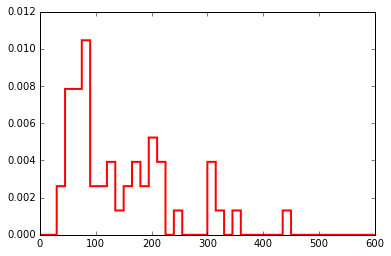

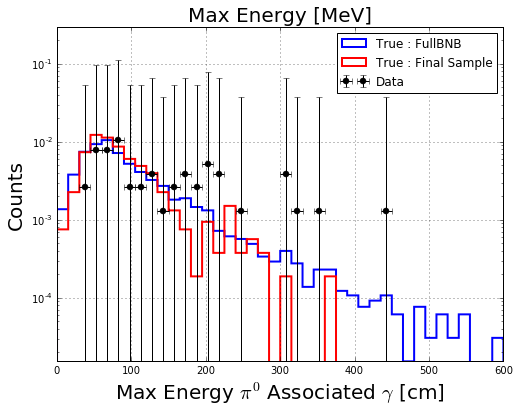

In [15]:
n=True #False #True
counts, bin_edges, _ = plt.hist(Emax_d,bins=40,histtype='step',normed=n,fill=None,edgecolor='r',lw=2,label='Data\'d',range=[0,600])
bin_centers = 0.5*(bin_edges[1:]+bin_edges[:-1])
bin_width = (bin_centers[1]-bin_centers[0])/2.

plt.figure(figsize=(8,6))
print counts #[3]/np.cumsum(counts)[-1]
plt.hist(full_g_min_e,bins=40,histtype='step',normed=n,fill=None,edgecolor='b',lw=2,label='True : FullBNB',range=[0,600])
plt.hist(fin_g_min_e,bins=40,histtype='step',normed=n,fill=None,edgecolor='r',lw=2,label='True : Final Sample',range=[0,600])
plt.errorbar(bin_centers,counts,yerr=np.sqrt(counts),xerr=bin_width,fmt='o',color='k',label='Data')
plt.grid(True)
plt.xlabel("Max Energy $\\pi^0$ Associated $\\gamma$ [cm]",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.title("Max Energy [MeV]",fontsize=20)
plt.yscale('log')
plt.ylim(0,0.3)
plt.legend()
plt.savefig("Plots/maxGE_COMPARE_mes.png")

[ 0.          0.          0.00392157  0.00653595  0.00653595  0.00784314
  0.00653595  0.00130719  0.00261438  0.00261438  0.00130719  0.00522876
  0.00130719  0.00392157  0.00392157  0.00261438  0.00261438  0.          0.
  0.          0.00130719  0.00130719  0.00130719  0.          0.
  0.00261438  0.          0.          0.          0.          0.          0.
  0.          0.          0.00130719  0.          0.          0.          0.
  0.        ]


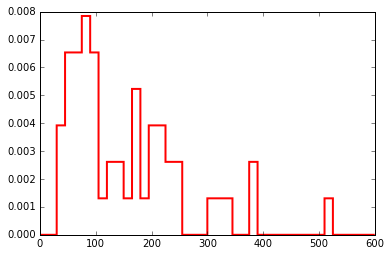

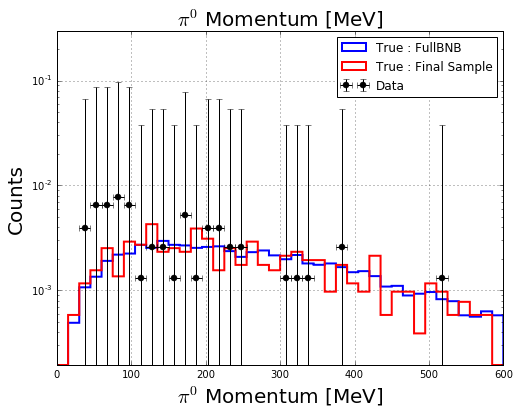

In [16]:
n=True #False #True
counts, bin_edges, _ = plt.hist(full_mom_d,bins=40,histtype='step',normed=n,fill=None,edgecolor='r',lw=2,label='Data\'d',range=[0,600])
bin_centers = 0.5*(bin_edges[1:]+bin_edges[:-1])
bin_width = (bin_centers[1]-bin_centers[0])/2.

plt.figure(figsize=(8,6))
print counts #[3]/np.cumsum(counts)[-1]
plt.hist(full_mom,bins=40,histtype='step',normed=n,fill=None,edgecolor='b',lw=2,label='True : FullBNB',range=[0,600])
plt.hist(fin_mom,bins=40,histtype='step',normed=n,fill=None,edgecolor='r',lw=2,label='True : Final Sample',range=[0,600])
plt.errorbar(bin_centers,counts,yerr=np.sqrt(counts),xerr=bin_width,fmt='o',color='k',label='Data')
plt.grid(True)
plt.xlabel("$\\pi^0$ Momentum [MeV]",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.title("$\\pi^0$ Momentum [MeV]",fontsize=20)
plt.yscale('log')
plt.ylim(0,0.3)
plt.legend()
plt.savefig("Plots/pi0MOM_COMPARE_mes.png")

[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  1.53846154  0.          0.          0.          3.07692308  0.
  1.53846154  1.53846154  1.53846154  0.          7.69230769  1.53846154
  1.53846154]


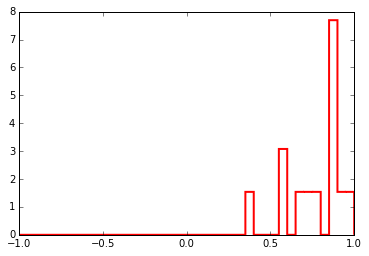

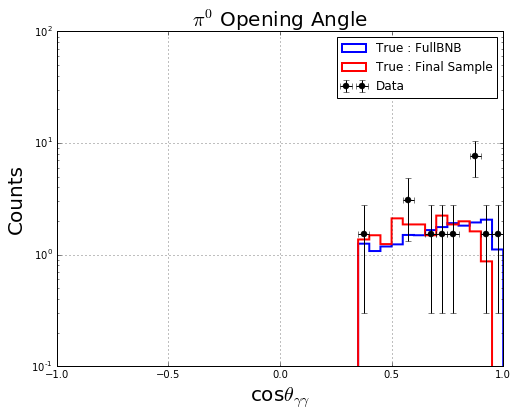

In [17]:
n=True #False #True
counts, bin_edges, _ = plt.hist(OAng_d,bins=40,histtype='step',normed=n,fill=None,edgecolor='r',lw=2,label='Data\'d',range=[-1,1])
bin_centers = 0.5*(bin_edges[1:]+bin_edges[:-1])
bin_width = (bin_centers[1]-bin_centers[0])/2.

full_angle_cut = [full_angle[i] for i in xrange(len(full_angle)) if full_angle[i] > 0.35] #[full_angle > 0.35]
fin_angle_cut = [fin_angle[i] for i in xrange(len(fin_angle)) if fin_angle[i] > 0.35] #[full_angle > 0.35]
#print "GO " ,full_angle_cut, full_angle
plt.figure(figsize=(8,6))
print counts #[3]/np.cumsum(counts)[-1]
plt.hist(full_angle_cut,bins=40,histtype='step',normed=n,fill=None,edgecolor='b',lw=2,label='True : FullBNB',range=[-1,1])
plt.hist(fin_angle_cut,bins=40,histtype='step',normed=n,fill=None,edgecolor='r',lw=2,label='True : Final Sample',range=[-1,1])
plt.errorbar(bin_centers,counts,yerr=np.sqrt(counts),xerr=bin_width,fmt='o',color='k',label='Data')
plt.grid(True)
plt.xlabel("cos$\\theta_{\gamma\gamma}$",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.title("$\\pi^0$ Opening Angle",fontsize=20)
plt.yscale('log')
#plt.ylim(0,0.3)
plt.legend()
plt.savefig("Plots/OAngle_COMPARE_mes.png")